# <span style="color:blue"> **Mall Customer Segmentation Data**</span>

**Content**

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

**Problem Statement**

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

# <span style="color:blue"> Importing Libraries</span>

In [1]:
from collections import Counter

from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

# <span style="color:blue">Loadings Datasets </span>

In [2]:
#Carga de la data "".csv"
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# <span style="color:blue">Pre-processing of data </span>

In [3]:
# Information about data values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# Description of the attributes
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Finding null values
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# Deleting the IDs
df = df.drop(["CustomerID"],axis = 1)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


### **Correlation matrix**

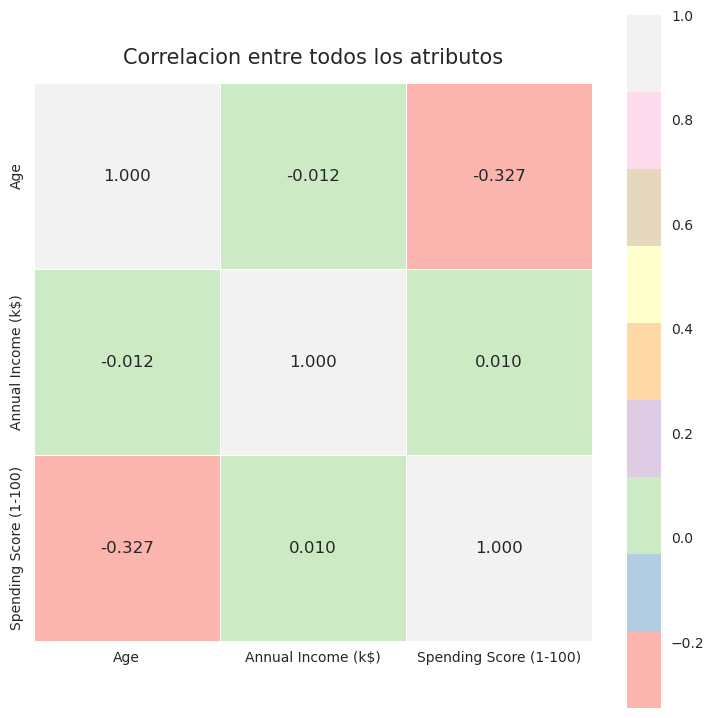

In [7]:
# Analyzing the correlation of the attributes
cm=df.corr()

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.title("Correlacion entre todos los atributos", fontsize=15,y=1.02)
plt.show()

In [8]:
# Corresponding information according to gender
df.groupby('Gender').describe()

Age                                                       \
        count       mean        std   min    25%   50%   75%   max   
Gender                                                               
Female  112.0  38.098214  12.644095  18.0  29.00  35.0  47.5  68.0   
Male     88.0  39.806818  15.514812  18.0  27.75  37.0  50.5  70.0   

       Annual Income (k$)             ...                \
                    count       mean  ...    75%    max   
Gender                                ...                 
Female              112.0  59.250000  ...  77.25  126.0   
Male                 88.0  62.227273  ...  78.00  137.0   

       Spending Score (1-100)                                              \
                        count       mean       std  min   25%   50%   75%   
Gender                                                                      
Female                  112.0  51.526786  24.11495  5.0  35.0  50.0  73.0   
Male                     88.0  48.511364  27.89677  1.0  24.5  50.0  70.0   

              
         max  
Gender        
Female  99.0  
Male    97.0  

[2 rows x 24 columns]

### **Boxplots**

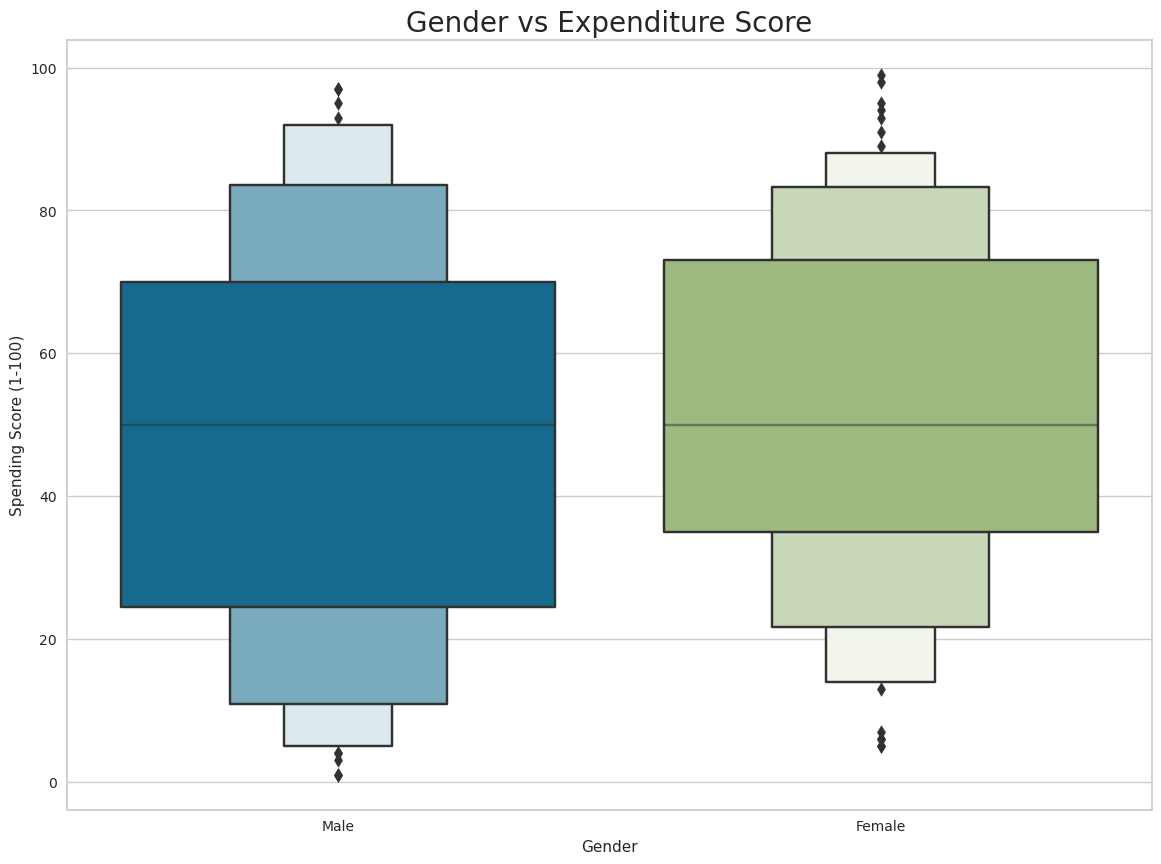

In [9]:
# Analyzing Gender and the Spending Score
plt.figure(figsize=(14,10))
sns.boxenplot(x=df['Gender'], y=df['Spending Score (1-100)'])
plt.title("Gender vs Expenditure Score", fontsize=20)
plt.show()


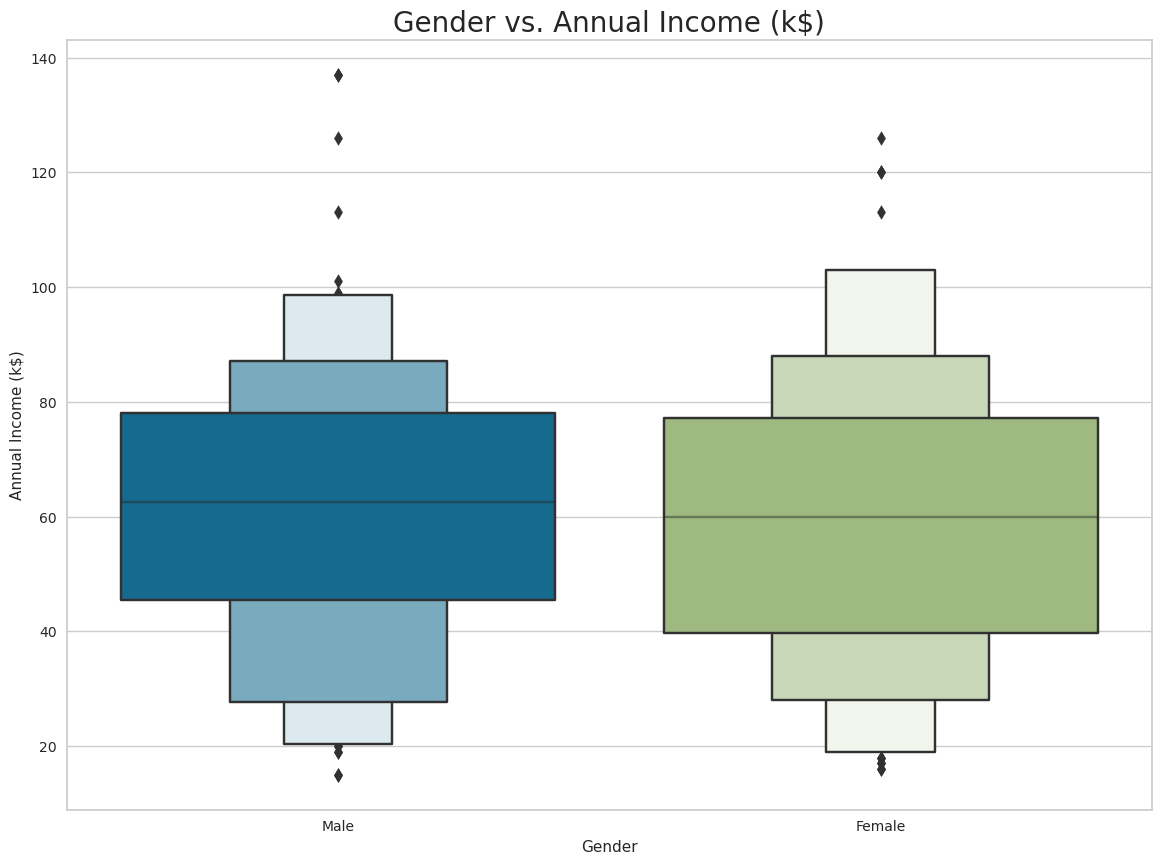

In [10]:
# Annual Income (k$) by Gender
plt.figure(figsize=(14,10))
sns.boxenplot(x=df['Gender'], y=df['Annual Income (k$)'])
plt.title("Gender vs. Annual Income (k$)", fontsize = 20)
plt.show()

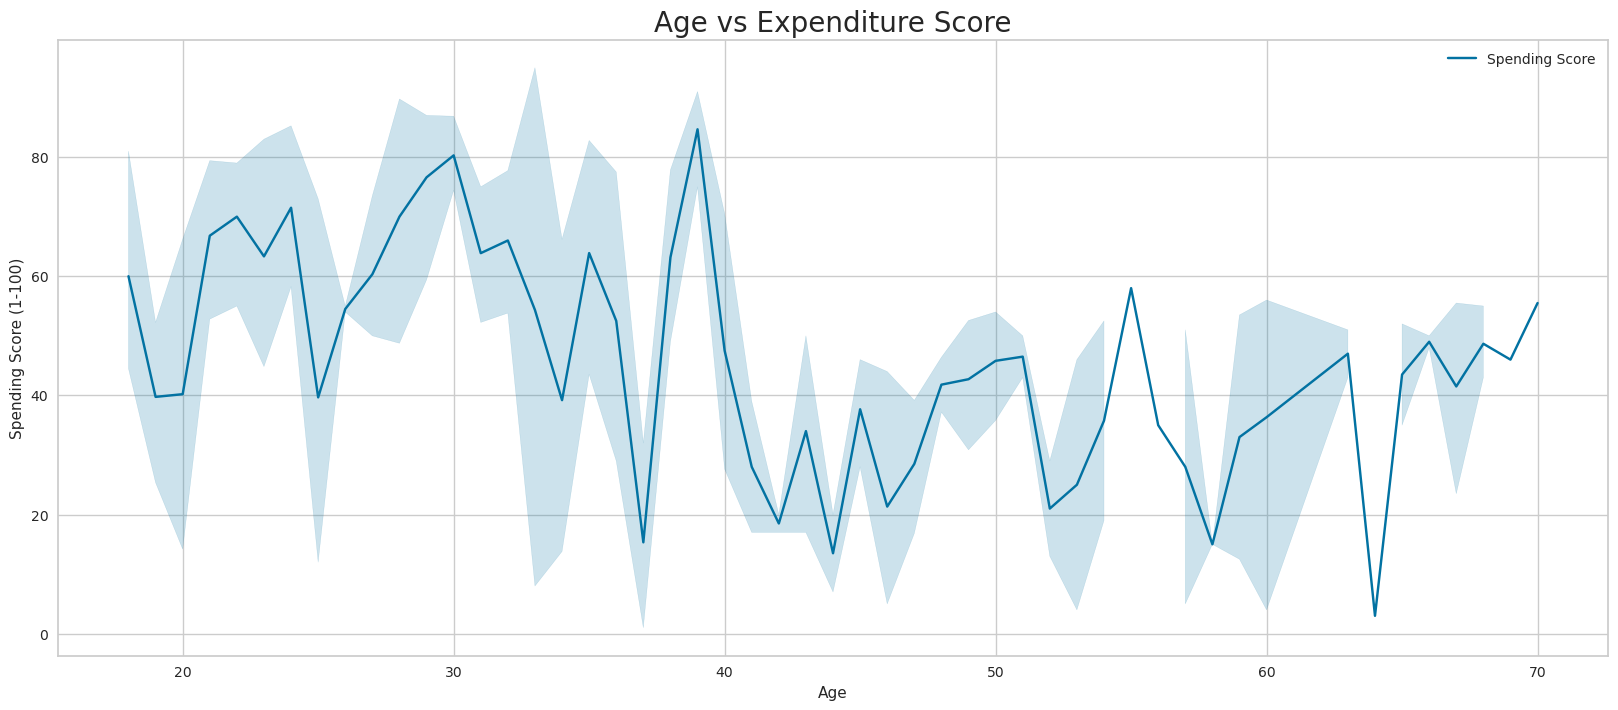

In [11]:
# Analyzing Age and Spending Score
plt.figure(figsize=(20, 8))
sns.lineplot(x=df['Age'], y=df['Spending Score (1-100)'], color= 'b', label="Spending Score")
plt.title("Age vs Expenditure Score", fontsize= 20)
plt.legend()
plt.show()

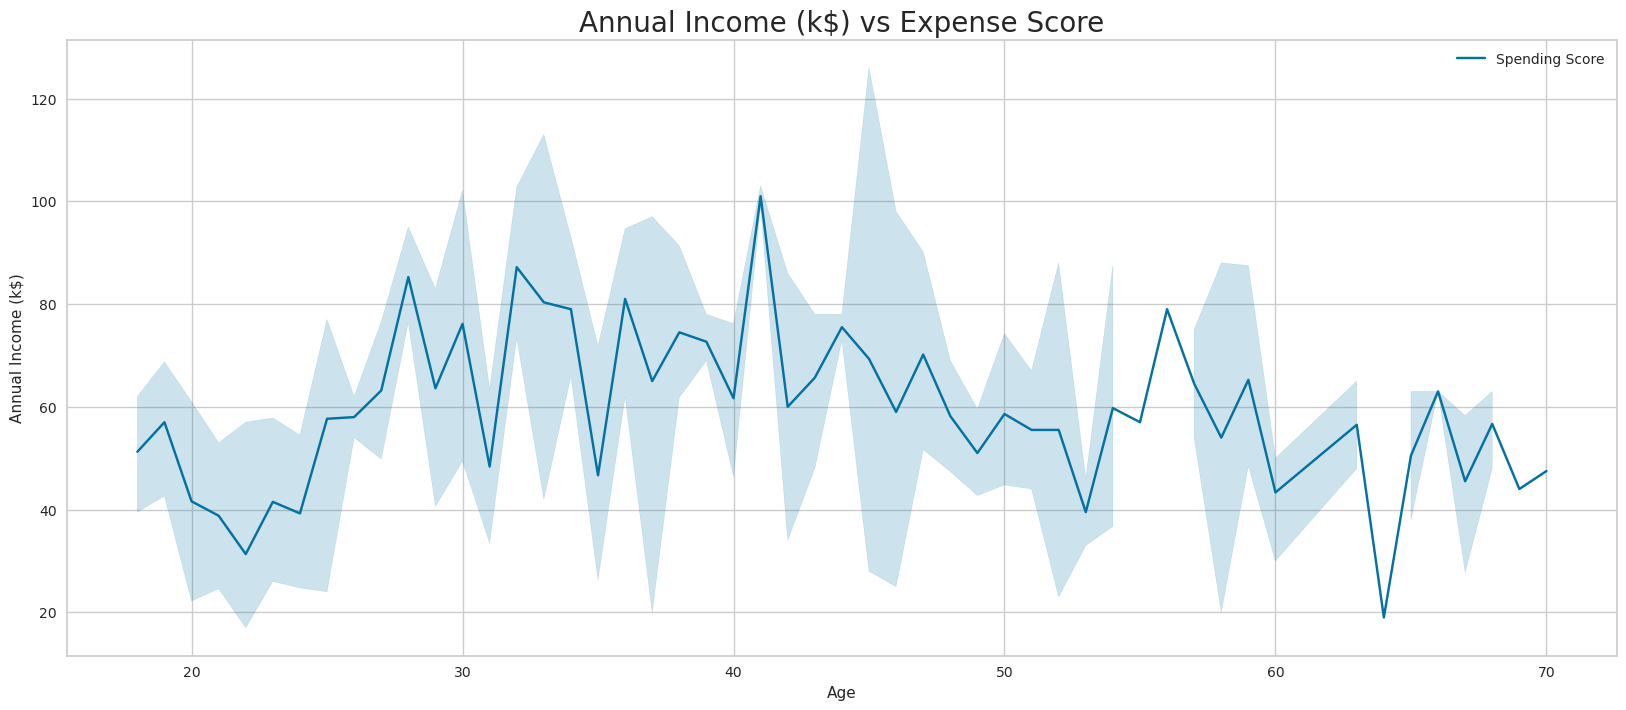

In [12]:
# Analyzing Annual Income (k$) and Spending Score
plt.figure(figsize=(20, 8))
sns.lineplot(x=df['Age'],y=df['Annual Income (k$)'], color= 'b', label="Spending Score")
plt.title("Annual Income (k$) vs Expense Score", fontsize= 20)
plt.legend()
plt.show()

In [13]:
# Removing the Gender
df_n = df.iloc[:,1:]
df_n

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [14]:
# Normalizing
df_scaled = normalize(df_n)
df_scaled = pd.DataFrame(df_scaled, columns=df_n.columns)
df_scaled.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,0.413925,0.326783,0.849635
1,0.247025,0.176446,0.952809
2,0.760286,0.608229,0.228086
3,0.280697,0.195267,0.939723
4,0.580683,0.318439,0.749269
5,0.271854,0.210069,0.939131
6,0.879131,0.452124,0.150708
7,0.233662,0.182866,0.954967
8,0.957680,0.284311,0.044891
9,0.373689,0.236669,0.896853


# <span style="color:blue">Clustering </span>

### **K - means**

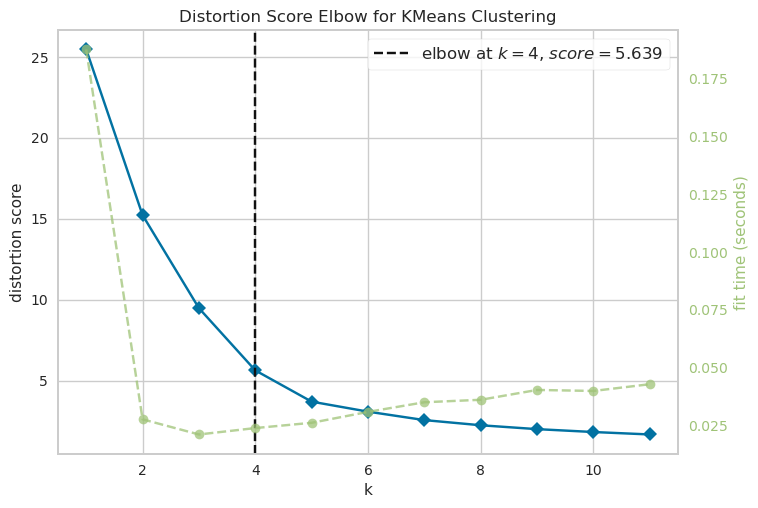

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
# Finding the optimal number of clusters
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_scaled)
visualizer.show()

From the above, the optimal number of clusters is obtained **"k"=4**

In [16]:
# Clustering using K-Means
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_scaled)

In [17]:
kmeans.labels_  

array([3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [18]:
kmeans.inertia_

5.638812950147301

In [19]:
kmeans.n_iter_

4

In [20]:
kmeans.cluster_centers_

array([[0.41187737, 0.87853247, 0.18142573],
       [0.30908136, 0.69074181, 0.63939607],
       [0.67556033, 0.53686695, 0.45703584],
       [0.31092997, 0.30556069, 0.88978774]])

In [21]:
# Number of elements of each cluster
Counter(kmeans.labels_)

Counter({3: 25, 2: 60, 1: 78, 0: 37})

In [22]:
# Adding the cluster number of each element of the data
df_c = df_n.assign(cluster = kmeans.labels_)
df_c

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,3
1,21,15,81,3
2,20,16,6,2
3,23,16,77,3
4,31,17,40,3
...,...,...,...,...
195,35,120,79,1
196,45,126,28,0
197,32,126,74,1
198,32,137,18,0


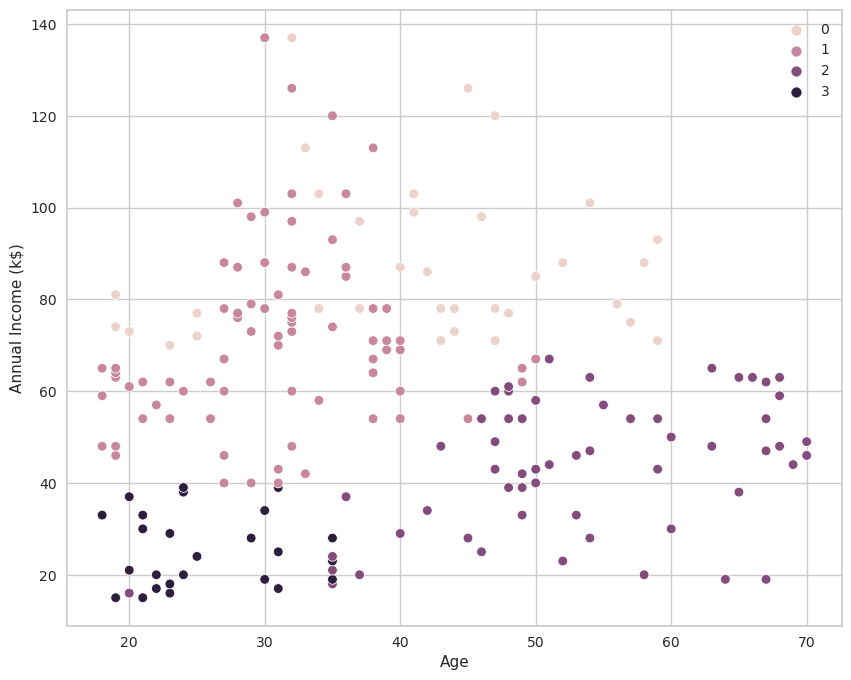

In [23]:
# 2D visualization of the clustering of the 3 attributes according to the cluster to which it belongs
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue=kmeans.labels_)
plt.show()

In [24]:
# 3D visualization of the clustering of the 3 attributes according to the cluster to which it belongs
fig = px.scatter_3d(df_c, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',color='cluster',opacity=0.8)
fig.show()

In [25]:
# Corresponding information according to cluster
df_c.groupby('cluster').describe()

Age                                                        \
        count       mean        std   min    25%   50%    75%   max   
cluster                                                               
0        37.0  40.729730  11.342273  19.0  34.00  42.0  47.00  59.0   
1        78.0  30.961538   7.370426  18.0  27.00  31.0  35.75  50.0   
2        60.0  53.516667  10.871346  20.0  47.75  52.5  63.25  70.0   
3        25.0  25.480000   5.339476  18.0  21.00  24.0  30.00  35.0   

        Annual Income (k$)             ...                \
                     count       mean  ...    75%    max   
cluster                                ...                 
0                     37.0  87.297297  ...  97.00  137.0   
1                     78.0  71.730769  ...  78.75  137.0   
2                     60.0  44.166667  ...  54.75   67.0   
3                     25.0  25.480000  ...  33.00   39.0   

        Spending Score (1-100)                                                \
                         count       mean        std   min   25%   50%   75%   
cluster                                                                        
0                         37.0  18.054054  10.461426   1.0  10.0  16.0  26.0   
1                         78.0  66.294872  17.854469  40.0  52.0  61.5  83.0   
2                         60.0  38.583333  16.624764   3.0  30.5  44.5  50.0   
3                         25.0  75.440000  15.066740  39.0  72.0  76.0  82.0   

               
          max  
cluster        
0        39.0  
1        97.0  
2        60.0  
3        99.0  

[4 rows x 24 columns]